In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

In [3]:
# dataframes creation for both training and testing datasets 
bd_df = pd.read_csv('Main.csv', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
bd_df

,event_date,event_type,Arrested,Total Cases,location
0,10/1/2021,Violence against civilians,8.0,17.0,Kaunia
1,10/1/2021,Riots,6.0,15.0,Kaunia
2,10/1/2021,Riots,10.0,55.0,Noamala
3,10/1/2021,Riots,10.0,55.0,Haluaghat
4,10/1/2021,Riots,12.0,57.0,Kaliganj
...,...,...,...,...,...
13930,10/1/2012,Smuggle,9.0,6.0,Dhaka
13931,4/1/2012,Firearms,29.0,14.0,Dhaka
13932,4/1/2012,Vehicles,69.0,65.0,Dhaka
13933,4/1/2012,Drugs,606.0,495.0,Dhaka


In [5]:
# Let's view the head of the training dataset
bd_df.head()

,event_date,event_type,Arrested,Total Cases,location
0,10/1/2021,Violence against civilians,8.0,17.0,Kaunia
1,10/1/2021,Riots,6.0,15.0,Kaunia
2,10/1/2021,Riots,10.0,55.0,Noamala
3,10/1/2021,Riots,10.0,55.0,Haluaghat
4,10/1/2021,Riots,12.0,57.0,Kaliganj


In [6]:
# Let's view the last elements in the training dataset
bd_df.tail()

,event_date,event_type,Arrested,Total Cases,location
13930,10/1/2012,Smuggle,9.0,6.0,Dhaka
13931,4/1/2012,Firearms,29.0,14.0,Dhaka
13932,4/1/2012,Vehicles,69.0,65.0,Dhaka
13933,4/1/2012,Drugs,606.0,495.0,Dhaka
13934,4/1/2012,Smuggle,3.0,2.0,Dhaka


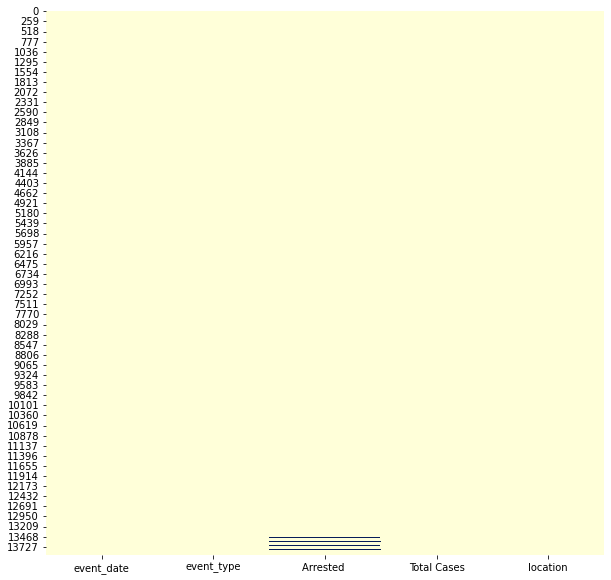

In [7]:
# Let's see how many null elements are contained in the data
plt.figure(figsize=(10,10))
sns.heatmap(bd_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [10]:
# Assembling a datetime by rearranging the dataframe column "Date". 

bd_df.Time = pd.to_datetime(bd_df.event_date, format='%m/%d/%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
bd_df

,event_date,event_type,Arrested,Total Cases,location
0,10/1/2021,Violence against civilians,8.0,17.0,Kaunia
1,10/1/2021,Riots,6.0,15.0,Kaunia
2,10/1/2021,Riots,10.0,55.0,Noamala
3,10/1/2021,Riots,10.0,55.0,Haluaghat
4,10/1/2021,Riots,12.0,57.0,Kaliganj
...,...,...,...,...,...
13930,10/1/2012,Smuggle,9.0,6.0,Dhaka
13931,4/1/2012,Firearms,29.0,14.0,Dhaka
13932,4/1/2012,Vehicles,69.0,65.0,Dhaka
13933,4/1/2012,Drugs,606.0,495.0,Dhaka


In [12]:
# setting the index to be the date 
bd_df.index = pd.DatetimeIndex(bd_df.Time)

In [13]:
bd_df

,event_date,event_type,Arrested,Total Cases,location
event_date,,,,,
2021-10-01,10/1/2021,Violence against civilians,8.0,17.0,Kaunia
2021-10-01,10/1/2021,Riots,6.0,15.0,Kaunia
2021-10-01,10/1/2021,Riots,10.0,55.0,Noamala
2021-10-01,10/1/2021,Riots,10.0,55.0,Haluaghat
2021-10-01,10/1/2021,Riots,12.0,57.0,Kaliganj
...,...,...,...,...,...
2012-10-01,10/1/2012,Smuggle,9.0,6.0,Dhaka
2012-04-01,4/1/2012,Firearms,29.0,14.0,Dhaka
2012-04-01,4/1/2012,Vehicles,69.0,65.0,Dhaka


In [41]:
bd_df['location'].value_counts()

Dhaka         1321
Chittagong     420
Rajshahi       369
Sylhet         343
Khulna         175
              ... 
Karnai           1
Bazra            1
Aziznagar        1
Dhalnagar        1
Maghia           1
Name: location, Length: 1343, dtype: int64

In [42]:
bd_df['location'].value_counts().iloc[:9].index

Index(['Dhaka', 'Chittagong', 'Rajshahi', 'Sylhet', 'Khulna', 'Bogra',
       'Gazipur', 'Barisal', 'Jessore'],
      dtype='object')

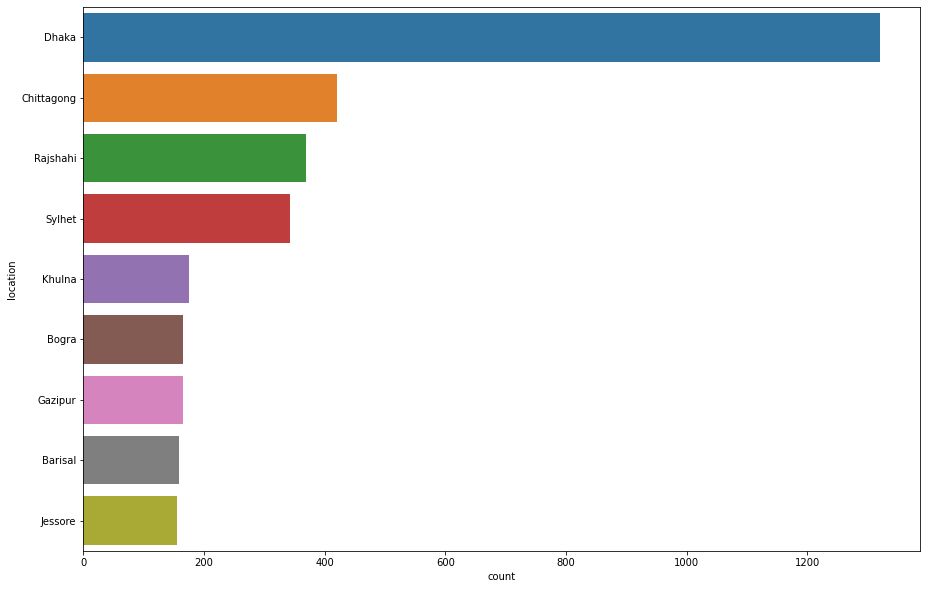

In [43]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'location', data = bd_df, order = bd_df['location'].value_counts().iloc[:9].index)

In [15]:
bd_df['event_type'].value_counts()

Riots                         8391
Violence against civilians    2984
Battles                       1790
Explosions/Remote violence     218
Firearms                        98
Vehicles                        98
Robbery                         58
Murder                          58
Kidnapping                      58
Drugs                           57
Violence                        52
Drugs                           41
Smuggling                       19
Smuggle                         13
Name: event_type, dtype: int64

In [17]:
bd_df['event_type'].value_counts().iloc[:9].index

Index(['Riots', 'Violence against civilians', 'Battles',
       'Explosions/Remote violence', 'Firearms', 'Vehicles', 'Robbery',
       'Murder', 'Kidnapping'],
      dtype='object')

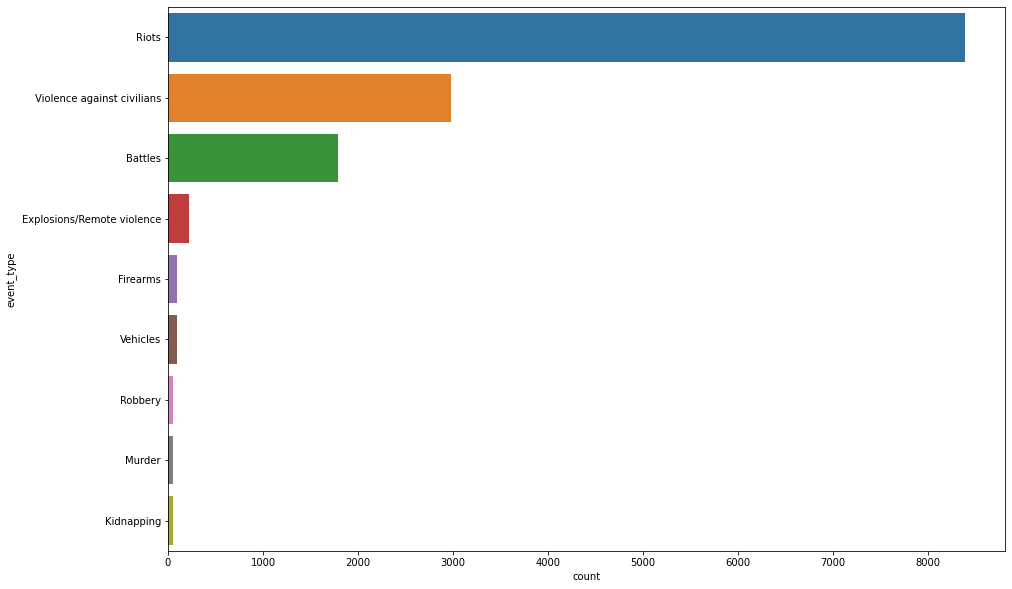

In [19]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'event_type', data = bd_df, order = bd_df['event_type'].value_counts().iloc[:9].index)

In [20]:
bd_df.resample('Y').size()

event_date
2010-12-31    1962
2011-12-31    1642
2012-12-31    1375
2013-12-31    2444
2014-12-31    1064
2015-12-31    1630
2016-12-31     636
2017-12-31     370
2018-12-31     750
2019-12-31     805
2020-12-31     568
2021-12-31     689
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

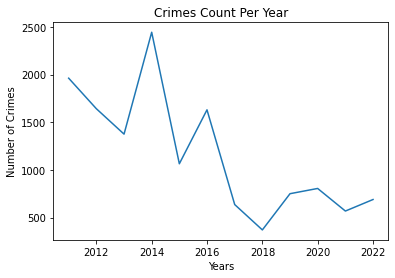

In [21]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(bd_df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [22]:
bd_df.resample('M').size()

event_date
2010-01-31    204
2010-02-28    202
2010-03-31    197
2010-04-30    135
2010-05-31     88
             ... 
2021-06-30     56
2021-07-31     42
2021-08-31     49
2021-09-30     52
2021-10-31     96
Freq: M, Length: 142, dtype: int64

Text(0, 0.5, 'Number of Crimes')

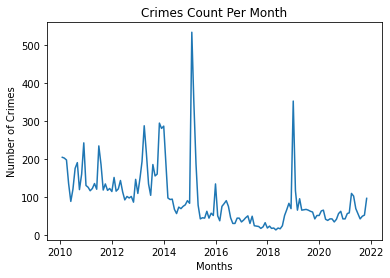

In [23]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(bd_df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [24]:
bd_df.resample('Q').size()

event_date
2010-03-31     603
2010-06-30     343
2010-09-30     484
2010-12-31     532
2011-03-31     363
2011-06-30     489
2011-09-30     437
2011-12-31     353
2012-03-31     387
2012-06-30     348
2012-09-30     299
2012-12-31     341
2013-03-31     630
2013-06-30     454
2013-09-30     500
2013-12-31     860
2014-03-31     378
2014-06-30     217
2014-09-30     217
2014-12-31     252
2015-03-31    1073
2015-06-30     165
2015-09-30     150
2015-12-31     242
2016-03-31     162
2016-06-30     247
2016-09-30     105
2016-12-31     122
2017-03-31     134
2017-06-30     103
2017-09-30      62
2017-12-31      71
2018-03-31      58
2018-06-30      47
2018-09-30     141
2018-12-31     504
2019-03-31     276
2019-06-30     198
2019-09-30     187
2019-12-31     144
2020-03-31     169
2020-06-30     122
2020-09-30     131
2020-12-31     146
2021-03-31     223
2021-06-30     227
2021-09-30     143
2021-12-31      96
Freq: Q-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

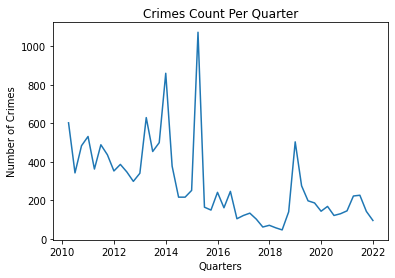

In [25]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(bd_df.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

In [26]:
bd_prophet = bd_df.resample('M').size().reset_index()

In [27]:
bd_prophet

,event_date,0
0,2010-01-31,204
1,2010-02-28,202
2,2010-03-31,197
3,2010-04-30,135
4,2010-05-31,88
...,...,...
137,2021-06-30,56
138,2021-07-31,42
139,2021-08-31,49
140,2021-09-30,52


In [28]:
bd_prophet.columns = ['Time', 'Crime Count']

In [29]:
bd_prophet

,Time,Crime Count
0,2010-01-31,204
1,2010-02-28,202
2,2010-03-31,197
3,2010-04-30,135
4,2010-05-31,88
...,...,...
137,2021-06-30,56
138,2021-07-31,42
139,2021-08-31,49
140,2021-09-30,52


In [30]:
bd_prophet_df = pd.DataFrame(bd_prophet)


In [31]:
bd_prophet_df

,Time,Crime Count
0,2010-01-31,204
1,2010-02-28,202
2,2010-03-31,197
3,2010-04-30,135
4,2010-05-31,88
...,...,...
137,2021-06-30,56
138,2021-07-31,42
139,2021-08-31,49
140,2021-09-30,52


In [32]:
bd_prophet_df.columns

Index(['Time', 'Crime Count'], dtype='object')

In [33]:
bd_prophet_df_final = bd_prophet_df.rename(columns={'Time':'ds', 'Crime Count':'y'})

In [34]:
bd_prophet_df_final

,ds,y
0,2010-01-31,204
1,2010-02-28,202
2,2010-03-31,197
3,2010-04-30,135
4,2010-05-31,88
...,...,...
137,2021-06-30,56
138,2021-07-31,42
139,2021-08-31,49
140,2021-09-30,52


In [35]:
m = Prophet()
m.fit(bd_prophet_df_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
# Forcasting into the future
future = m.make_future_dataframe(periods=730)
forecast = m.predict(future)

In [37]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-31,162.417261,118.445992,279.934056,162.417261,162.417261,39.205710,39.205710,39.205710,39.205710,39.205710,39.205710,0.0,0.0,0.0,201.622970
1,2010-02-28,161.569819,87.052090,249.456577,161.569819,161.569819,12.344914,12.344914,12.344914,12.344914,12.344914,12.344914,0.0,0.0,0.0,173.914733
2,2010-03-31,160.631580,96.200678,259.393051,160.631580,160.631580,16.114858,16.114858,16.114858,16.114858,16.114858,16.114858,0.0,0.0,0.0,176.746438
3,2010-04-30,159.723607,72.496279,235.638367,159.723607,159.723607,-5.340082,-5.340082,-5.340082,-5.340082,-5.340082,-5.340082,0.0,0.0,0.0,154.383525
4,2010-05-31,158.785369,54.023879,218.148377,158.785369,158.785369,-24.070681,-24.070681,-24.070681,-24.070681,-24.070681,-24.070681,0.0,0.0,0.0,134.714688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,2023-10-27,14.316652,-75.028123,92.351732,14.226269,14.410191,-2.566206,-2.566206,-2.566206,-2.566206,-2.566206,-2.566206,0.0,0.0,0.0,11.750445
868,2023-10-28,14.288061,-74.777215,97.335998,14.197482,14.381673,-1.762554,-1.762554,-1.762554,-1.762554,-1.762554,-1.762554,0.0,0.0,0.0,12.525507
869,2023-10-29,14.259471,-66.964884,98.149724,14.168695,14.353139,-0.936906,-0.936906,-0.936906,-0.936906,-0.936906,-0.936906,0.0,0.0,0.0,13.322565
870,2023-10-30,14.230880,-70.700844,100.922452,14.139908,14.324762,-0.098686,-0.098686,-0.098686,-0.098686,-0.098686,-0.098686,0.0,0.0,0.0,14.132194


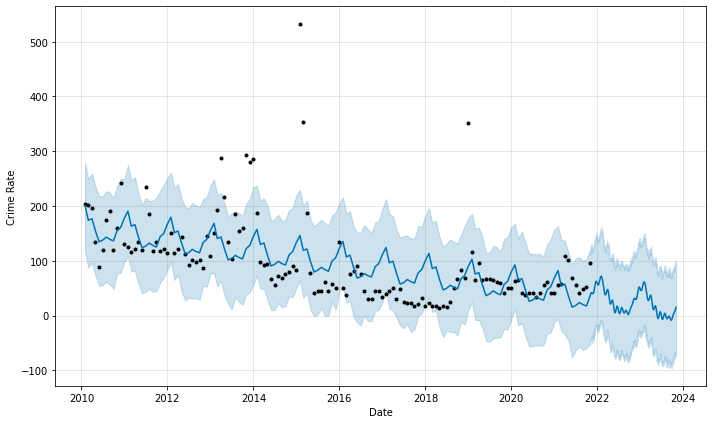

In [38]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

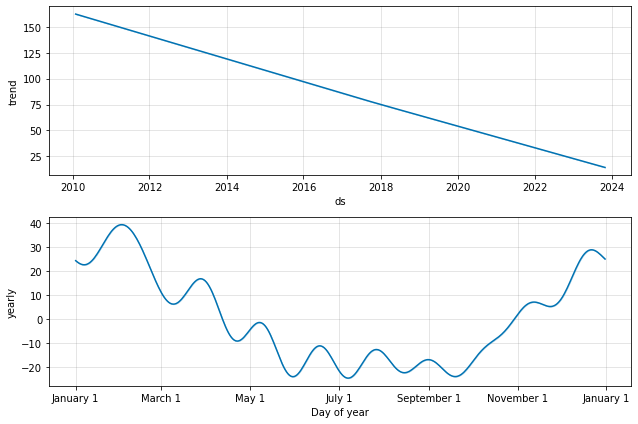

In [39]:
figure3 = m.plot_components(forecast)